In [10]:
#imports 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [11]:
features = pd.read_csv('features.csv')
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [12]:
train = pd.read_csv('train.csv')
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [13]:
stock = pd.read_csv('WMT.csv')
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.036175,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.036038,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.035627,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.035627,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.035079,870400
...,...,...,...,...,...,...,...
12561,2022-06-17,120.019997,120.879997,117.970001,118.290001,118.290001,12166700
12562,2022-06-21,118.300003,122.779999,118.220001,122.169998,122.169998,7972200
12563,2022-06-22,122.099998,123.250000,120.589996,120.690002,120.690002,6745000
12564,2022-06-23,121.750000,123.959999,121.199997,123.620003,123.620003,6013600


In [14]:
# Read the features.csv file into a DataFrame
features = pd.read_csv('features.csv')
stock = pd.read_csv('WMT.csv')
train = pd.read_csv('train.csv')

# Merge features and train data on 'Date'
merged_data = pd.merge(features, train, on=['Store', 'Date', 'IsHoliday'])

# Merge merged_data and stock data on 'Date'
final_merged_data = pd.merge(merged_data, stock, on='Date')
final_merged_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Open,High,Low,Close,Adj Close,Volume
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409722,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,75.199997,75.419998,74.680000,75.110001,60.310581,4446900
409723,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,75.199997,75.419998,74.680000,75.110001,60.310581,4446900
409724,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,75.199997,75.419998,74.680000,75.110001,60.310581,4446900
409725,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,75.199997,75.419998,74.680000,75.110001,60.310581,4446900


In [15]:
# Filter data for 2010 to 2012
start_date = '2010-01-01'
end_date = '2012-12-31'
final_merged_data = final_merged_data[(final_merged_data['Date'] >= start_date) & (final_merged_data['Date'] <= end_date)]
final_merged_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Open,High,Low,Close,Adj Close,Volume
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409722,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,75.199997,75.419998,74.680000,75.110001,60.310581,4446900
409723,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,75.199997,75.419998,74.680000,75.110001,60.310581,4446900
409724,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,75.199997,75.419998,74.680000,75.110001,60.310581,4446900
409725,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,75.199997,75.419998,74.680000,75.110001,60.310581,4446900


In [16]:
features['Date'] = pd.to_datetime(features['Date'])
stock['Date'] = pd.to_datetime(stock['Date'])

# Filter data for 2010 to 2012
start_date = '2010-01-01'
end_date = '2012-12-31'
features_filtered = features[(features['Date'] >= start_date) & (features['Date'] <= end_date)]
stock_filtered = stock[(stock['Date'] >= start_date) & (stock['Date'] <= end_date)]

# Group by 'Date' and calculate the mean unemployment for each date
date_unemployment = features_filtered.groupby('Date')['Unemployment'].mean().reset_index()

# Merge mean unemployment values with stock data based on the 'Date' column
merged_data = pd.merge(date_unemployment, stock_filtered, on='Date')
merged_data

,Date,Unemployment,Open,High,Low,Close,Adj Close,Volume
0,2010-02-05,8.619311,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
1,2010-02-12,8.619311,53.110001,53.110001,52.660000,52.900002,39.660881,17038400
2,2010-02-19,8.619311,53.189999,53.580002,53.070000,53.490002,40.103210,15090400
3,2010-02-26,8.619311,54.220001,54.240002,53.500000,54.070000,40.538071,15952900
4,2010-03-05,8.619311,53.970001,54.169998,53.500000,54.139999,40.590546,11375100
...,...,...,...,...,...,...,...,...
143,2012-11-30,6.953711,70.970001,72.120003,70.849998,72.019997,57.829403,12485200
144,2012-12-07,6.953711,71.900002,72.589996,71.849998,72.290001,58.368347,7283000
145,2012-12-14,6.953711,69.050003,69.300003,68.739998,68.750000,55.510063,10502300
146,2012-12-21,6.953711,68.870003,69.160004,68.269997,68.650002,55.429321,13231000


In [17]:
# Calculate average weekly sales based on store
store_avg_sales = final_merged_data.groupby('Store')['Weekly_Sales'].mean().reset_index()

# Display the average weekly sales for each store
print(store_avg_sales)

    Store  Weekly_Sales
0       1  21590.537734
1       2  26722.773150
2       3   6338.232531
3       4  28981.088339
4       5   5025.371242
5       6  21745.312047
6       7   8317.063798
7       8  13054.044859
8       9   8717.317520
9      10  26093.554362
10     11  19143.749247
11     12  14772.352425
12     13  27154.980090
13     14  28491.967489
14     15   8911.811478
15     16   7830.711215
16     17  12891.372641
17     18  15604.930480
18     19  20197.511298
19     20  29245.224424
20     21  11188.930473
21     22  15038.299626
22     23  19593.387880
23     24  18836.582344
24     25  10217.725167
25     26  14490.344814
26     27  24643.100524
27     28  18615.961128
28     29   8073.557409
29     30   8751.658111
30     31  19603.307105
31     32  16262.318491
32     33   5725.673913
33     34  13438.052065
34     35  13695.725250
35     36   8572.841887
36     37  10284.922507
37     38   7483.494502
38     39  20849.804355
39     40  13673.395443
40     41  17863

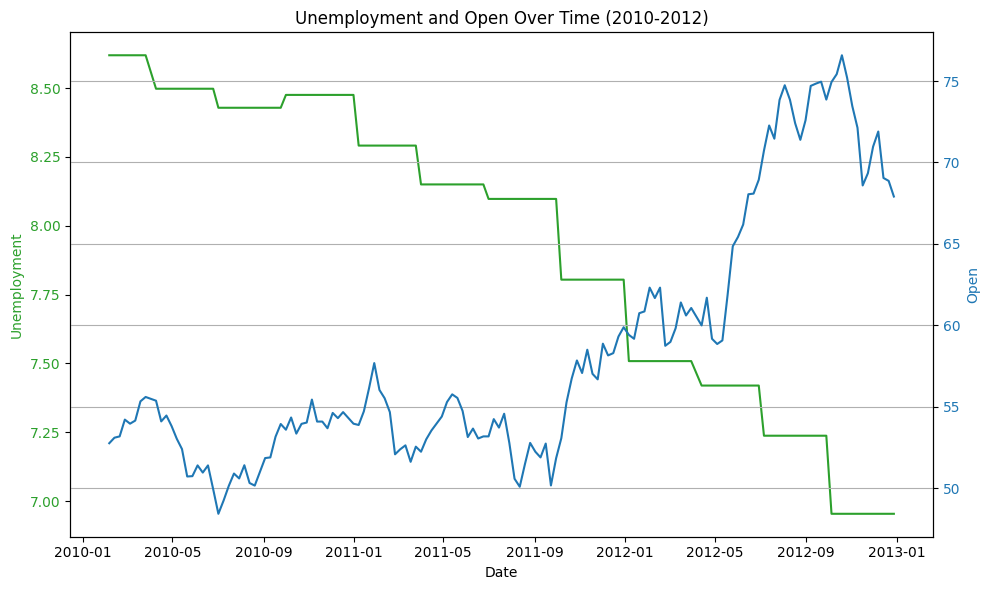

In [18]:
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Unemployment on the first y-axis
color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment', color=color)
ax1.plot(merged_data['Date'], merged_data['Unemployment'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Open
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Open', color=color)
ax2.plot(merged_data['Date'], merged_data['Open'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Adding labels and title
plt.title('Unemployment and Open Over Time (2010-2012)')
plt.xticks(rotation=45)

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
# Select features and target variable
X = final_merged_data[['Unemployment']]
y = final_merged_data['Open']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', round(mse,2))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', round(r2,4))

Mean Squared Error: 49.48
R-squared: 0.0456


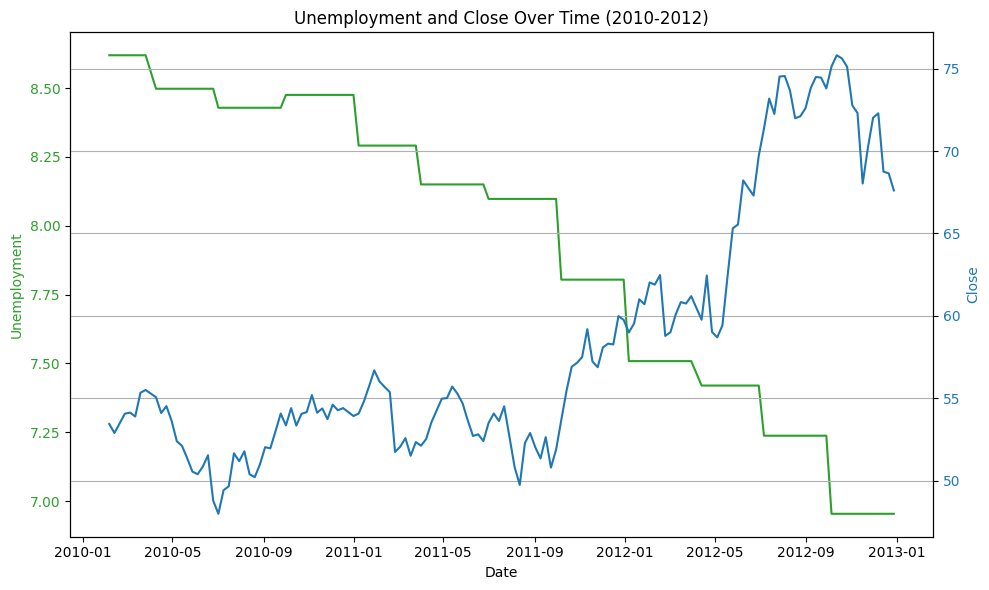

In [20]:
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Unemployment on the first y-axis
color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment', color=color)
ax1.plot(merged_data['Date'], merged_data['Unemployment'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Close
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Close', color=color)
ax2.plot(merged_data['Date'], merged_data['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Adding labels and title
plt.title('Unemployment and Close Over Time (2010-2012)')
plt.xticks(rotation=45)

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
# Select features and target variable
X = final_merged_data[['Unemployment']]
y = final_merged_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', round(mse,2))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', round(r2,4))

Mean Squared Error: 50.16
R-squared: 0.0458


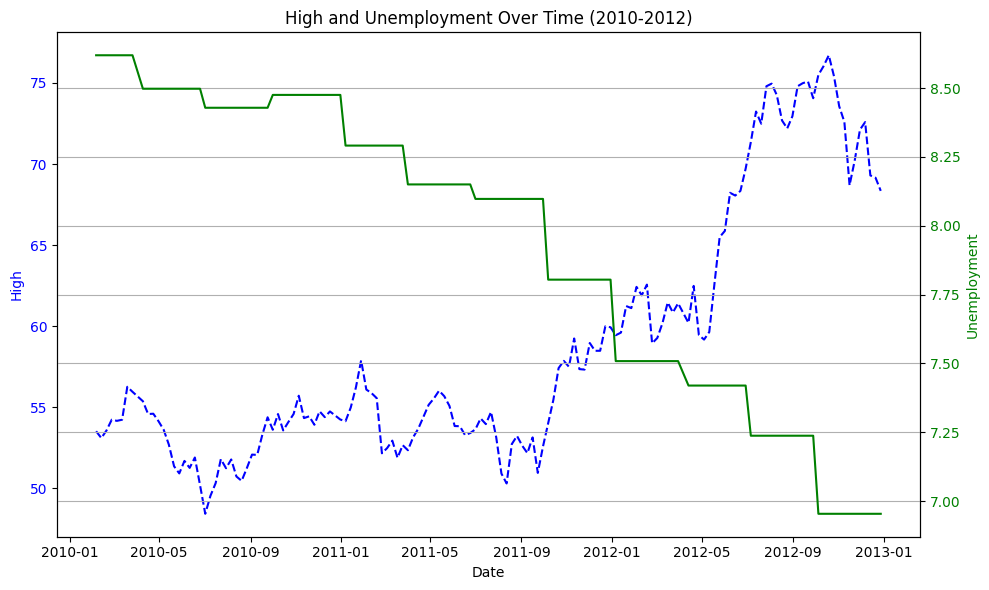

In [22]:
# Plot High
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(merged_data['Date'], merged_data['High'], color='blue', linestyle='--')
ax1.set_xlabel('Date')
ax1.set_ylabel('High', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Unemployment
ax2 = ax1.twinx()
ax2.plot(merged_data['Date'], merged_data['Unemployment'], color='green')
ax2.set_ylabel('Unemployment', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('High and Unemployment Over Time (2010-2012)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
# Select features and target variable
X = final_merged_data[['Unemployment']]
y = final_merged_data['High']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', round(mse,2))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', round(r2,4))

Mean Squared Error: 50.17
R-squared: 0.0459


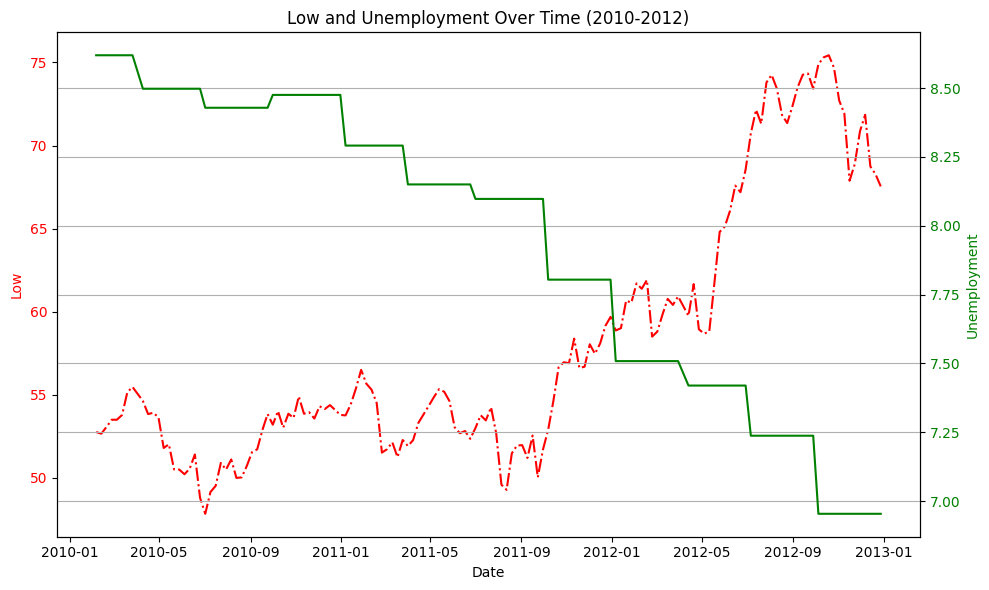

In [24]:
# Plot Low
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(merged_data['Date'], merged_data['Low'], color='red', linestyle='-.')
ax1.set_xlabel('Date')
ax1.set_ylabel('Low', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a second y-axis for Unemployment
ax2 = ax1.twinx()
ax2.plot(merged_data['Date'], merged_data['Unemployment'], color='green')
ax2.set_ylabel('Unemployment', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Low and Unemployment Over Time (2010-2012)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Select features and target variable
X = final_merged_data[['Unemployment']]
y = final_merged_data['Low']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', round(mse,2))
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', round(r2,4))

Mean Squared Error: 49.48
R-squared: 0.0457


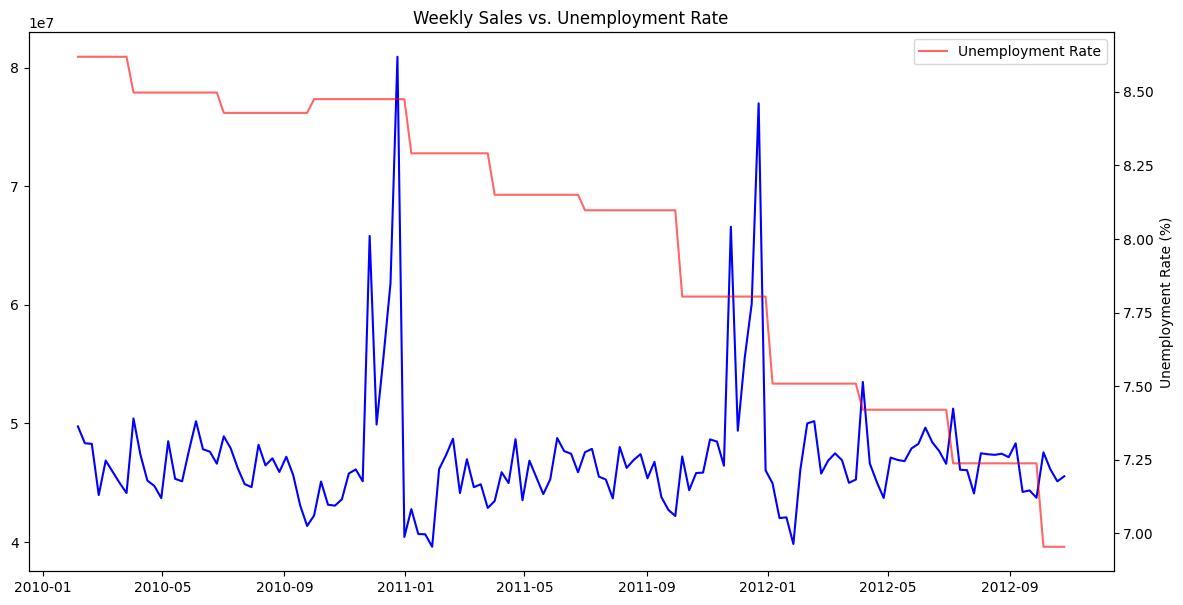

In [26]:
features['Date'] = pd.to_datetime(features['Date'])
train['Date'] = pd.to_datetime(train['Date'])
agg_features = features.groupby('Date')['Unemployment'].mean().reset_index()
agg_train = train.groupby('Date')['Weekly_Sales'].sum().reset_index()
merged_df = pd.merge(agg_features, agg_train, on='Date')


plt.figure(figsize=(14, 7))
plt.plot(merged_df['Date'], merged_df['Weekly_Sales'], label='Weekly Sales', color='blue')
ax2 = plt.twinx()
ax2.plot(merged_df['Date'], merged_df['Unemployment'], label='Unemployment Rate', color='red', alpha=0.6)

plt.title('Weekly Sales vs. Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
ax2.set_ylabel('Unemployment Rate (%)')

plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [29]:
# Read the features.csv file into a DataFrame
features = pd.read_csv('features.csv')
stock = pd.read_csv('WMT.csv')
train = pd.read_csv('train.csv')

# Merge features and train data on 'Date'
merged_data = pd.merge(features, train, on=['Store', 'Date', 'IsHoliday'])

# Merge merged_data and stock data on 'Date'
final_merged_data = pd.merge(merged_data, stock, on='Date')

# Filter data for 2010 to 2012
start_date = '2010-01-01'
end_date = '2012-12-31'
final_merged_data = final_merged_data[(final_merged_data['Date'] >= start_date) & (final_merged_data['Date'] <= end_date)]

# Select features and target variable
X = final_merged_data[['Weekly_Sales']]
y = final_merged_data['Unemployment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', round(mse,2))
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', round(r2,4))

Mean Squared Error: 3.46
R-squared: 0.0008
